In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
train = pd.read_csv('train_data.csv')
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2


In [6]:
test = pd.read_csv('test_data.csv')
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
0,cxcon_2,0,331,6085,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,13,13,255,255
1,cxcon_5,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
2,cxcon_8,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
3,cxcon_11,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,510,509,255,255
4,cxcon_14,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255


In [7]:
train.describe()

,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
count,169307.000000,1.693070e+05,1.693070e+05,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,...,169307.000000,169307.000000,169307.0,169307.000000,169307.000000,169307.000000,169307.000000,169307.00000,169307.000000,169307.000000
mean,44.136722,1.077011e+03,7.501477e+02,0.171399,0.171479,0.062442,0.062478,0.791319,0.021317,0.028090,...,0.000077,0.001057,0.0,0.000006,0.000868,330.966203,291.598014,232.98837,189.733508,0.633719
std,659.337783,4.302746e+04,3.527929e+04,0.376214,0.376593,0.241000,0.241354,0.388389,0.084299,0.139745,...,0.009412,0.036762,0.0,0.002430,0.029453,213.028182,246.012392,63.94995,105.631984,0.816991
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,118.000000,10.000000,255.00000,58.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,510.000000,510.000000,255.00000,255.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,511.000000,511.000000,255.00000,255.000000,1.000000
max,42596.000000,1.139690e+07,1.173059e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,0.0,1.000000,1.000000,511.000000,511.000000,255.00000,255.000000,2.000000


In [8]:
test.describe()

,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
count,91166.000000,9.116600e+04,9.116600e+04,91166.000000,91166.000000,91166.000000,91166.000000,91166.000000,91166.000000,91166.000000,...,91166.000000,91166.000000,91166.000000,91166.0,91166.0,91166.000000,91166.000000,91166.000000,91166.000000,91166.000000
mean,44.499583,1.861971e+03,6.885151e+02,0.169543,0.169616,0.064301,0.064299,0.791855,0.021109,0.027920,...,0.000570,0.000088,0.001020,0.0,0.0,0.001053,331.381217,292.098951,233.063971,189.831714
std,676.749529,2.977819e+05,2.522652e+04,0.374541,0.374968,0.244362,0.244723,0.388186,0.083526,0.139383,...,0.054216,0.009367,0.040685,0.0,0.0,0.032433,212.975581,245.983207,63.960845,105.601719
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,118.000000,10.000000,255.000000,59.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,255.000000,255.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,255.000000,255.000000
max,39910.000000,8.958152e+07,7.028652e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,255.000000,255.000000


In [10]:
train.shape

(169307, 43)

In [11]:
train.columns

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target'],
      dtype='object')

# Lets do some columns analysis

In [11]:
train['connection_id']
# every row has unique id

0              cxcon_1
1              cxcon_4
2              cxcon_7
3             cxcon_10
4             cxcon_13
5             cxcon_16
6             cxcon_19
7             cxcon_22
8             cxcon_25
9             cxcon_28
10            cxcon_31
11            cxcon_34
12            cxcon_37
13            cxcon_40
14            cxcon_43
15            cxcon_46
16            cxcon_49
17            cxcon_52
18            cxcon_55
19            cxcon_58
20            cxcon_61
21            cxcon_64
22            cxcon_67
23            cxcon_70
24            cxcon_73
25            cxcon_76
26            cxcon_79
27            cxcon_82
28            cxcon_85
29            cxcon_88
              ...     
169277    cxcon_507832
169278    cxcon_507835
169279    cxcon_507838
169280    cxcon_507841
169281    cxcon_507844
169282    cxcon_507847
169283    cxcon_507850
169284    cxcon_507853
169285    cxcon_507856
169286    cxcon_507859
169287    cxcon_507862
169288    cxcon_507865
169289    c

In [13]:
train['cont_1'].describe()

count    169307.000000
mean         44.136722
std         659.337783
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       42596.000000
Name: cont_1, dtype: float64

In [14]:
# here we can see that the std is very much. we can try log transform of this feature  

In [15]:
np.log(train['cont_1']+1).describe()

count    169307.000000
mean          0.103119
std           0.821221
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.659539
Name: cont_1, dtype: float64

In [16]:
train['cont_2'].describe()

count    1.693070e+05
mean     1.077011e+03
std      4.302746e+04
min      0.000000e+00
25%      4.500000e+01
50%      5.200000e+02
75%      1.032000e+03
max      1.139690e+07
Name: cont_2, dtype: float64

In [17]:
# this too.we can try log transform of this feature  
np.log(train['cont_2']+1).describe()

count    169307.000000
mean          4.954831
std           2.839303
min           0.000000
25%           3.828641
50%           6.255750
75%           6.940222
max          16.248852
Name: cont_2, dtype: float64

In [18]:
train['connection_id'].head()

0     cxcon_1
1     cxcon_4
2     cxcon_7
3    cxcon_10
4    cxcon_13
Name: connection_id, dtype: object

In [12]:
test_id = test['connection_id']

In [13]:
train['connection_id'] = train['connection_id'].apply(lambda x:float(x.split('_')[1]))

In [14]:
test['connection_id'] = test['connection_id'].apply(lambda x:float(x.split('_')[1]))

In [15]:
train['connection_id'].tail()

169302    507907.0
169303    507910.0
169304    507913.0
169305    507916.0
169306    507919.0
Name: connection_id, dtype: float64

In [24]:
lis = ['connection_id','cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23']

In [25]:
for i in lis:
    print(i+"------>"+str(np.std(train[i])))

connection_id------>146624.1630359744
cont_1------>659.335835651979
cont_2------>43027.33006336997
cont_3------>35279.18137456218
cont_4------>0.37621244720068864
cont_5------>0.37659232161432565
cont_6------>0.2409997810367016
cont_7------>0.2413529126960743
cont_8------>0.3883874722344847
cont_9------>0.0842990370898698
cont_10------>0.13974443241658954
cont_11------>0.40992108250085896
cont_12------>0.10754666808566363
cont_13------>0.4819743371901971
cont_14------>0.04142517831103984
cont_15------>0.376157420742969
cont_16------>0.3764642782100066
cont_17------>0.23959020563412453
cont_18------>0.2395536891005452
cat_1------>0.9593801816939245
cat_2------>4.932956965902511
cat_3------>2.7815778702054392
cat_4------>0.0034369639389637647
cat_5------>0.039032518707956036
cat_6------>0.004860615370399827
cat_7------>0.43115786044183013
cat_8------>0.010310404595114871
cat_9------>0.3524725503279516
cat_10------>1.5320138953584017
cat_11------>0.010019941795807081
cat_12------>0.008762

In [13]:
lis1 = ['cont_1', 'cont_2', 'cont_3','cat_20', 'cat_21', 'cat_22','cat_23']
for i in lis1:
    train[i] = (np.log(train[i]+1))

In [14]:
lis1 = ['cont_1', 'cont_2', 'cont_3','cat_20', 'cat_21', 'cat_22','cat_23']
for i in lis1:
    test[i] = (np.log(test[i]+1))

In [28]:
for i in lis:
    print(i+"------>"+str(np.std(train[i])))

connection_id------>146624.1630359744
cont_1------>0.8212187188187758
cont_2------>2.839294201575085
cont_3------>2.6376202081987996
cont_4------>0.37621244720068864
cont_5------>0.37659232161432565
cont_6------>0.2409997810367016
cont_7------>0.2413529126960743
cont_8------>0.3883874722344847
cont_9------>0.0842990370898698
cont_10------>0.13974443241658954
cont_11------>0.40992108250085896
cont_12------>0.10754666808566363
cont_13------>0.4819743371901971
cont_14------>0.04142517831103984
cont_15------>0.376157420742969
cont_16------>0.3764642782100066
cont_17------>0.23959020563412453
cont_18------>0.2395536891005452
cat_1------>0.9593801816939245
cat_2------>4.932956965902511
cat_3------>2.7815778702054392
cat_4------>0.0034369639389637647
cat_5------>0.039032518707956036
cat_6------>0.004860615370399827
cat_7------>0.43115786044183013
cat_8------>0.010310404595114871
cat_9------>0.3524725503279516
cat_10------>1.5320138953584017
cat_11------>0.010019941795807081
cat_12------>0.008

In [29]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
connection_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923984,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861445,NaN
cont_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_4,NaN,NaN,NaN,NaN,NaN,0.998541,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_5,NaN,NaN,NaN,NaN,0.998541,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_7,NaN,NaN,NaN,NaN,NaN,NaN,0.995373,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont_8,NaN,NaN,0.923984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887932,NaN
cont_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [17]:
import xgboost as xgb

In [18]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred,y_valid):
    acc = accuracy_score(y_valid, pred)
    return 'maccuracy', acc

In [19]:
features = ['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
            'cont_6', 'cont_7','cont_8','cont_9', 'cont_10','cont_11','cont_12',
            'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
            'cat_1', 'cat_2','cat_3','cat_9','cat_20', 'cat_21', 'cat_22','cat_23']
X_train = train[features]
target = train['target']
x_train, X_valid, y_train, y_valid = train_test_split(X_train, target, train_size = 0.7, stratify = target, random_state = 2017)
model = BernoulliNB()
model.fit(x_train,y_train)
pred_test = model.predict(X_valid)
multAcc(pred_test,y_valid)

('maccuracy', 0.75923847774299613)

In [85]:
features = ['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
            'cont_6', 'cont_7','cont_8','cont_9', 'cont_10','cont_11','cont_12',
            'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
            'cat_1', 'cat_2','cat_3','cat_9','cat_20', 'cat_21', 'cat_22','cat_23',
            'cont_3_new', 'cont_14_new', 'cont_2_new','cont_8_new']
X_train = train[features]
target = train['target']
x_train, X_valid, y_train, y_valid = train_test_split(X_train, target, train_size = 0.7, stratify = target, random_state = 2017)
model = xgb.XGBClassifier(learning_rate =0.10,n_estimators=500,max_depth=5,min_child_weight=2,gamma=0.1,subsample=0.95,
                          colsample_bytree=0.60,reg_alpha=0.15,objective= 'multi:softmax',nthread=4,
                          scale_pos_weight=1,seed=27)
model.fit(x_train,y_train)
pred_test = model.predict(X_valid)
multAcc(pred_test,y_valid)

('maccuracy', 0.78093438072175303)

In [132]:
pred = model.predict(test[features])

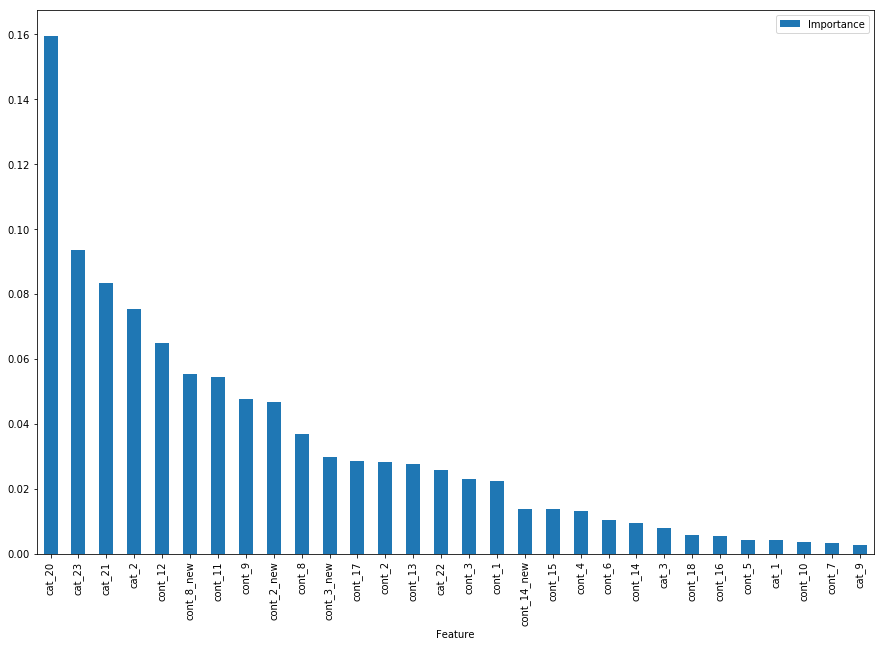

In [86]:
feature_importance = pd.Series(model.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [134]:
sub = pd.DataFrame()
sub['connection_id'] = test_id
sub['target'] = pred
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [35]:
import seaborn as sns

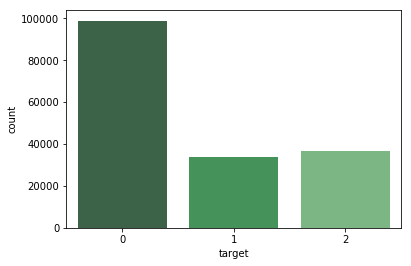

In [36]:
sns.countplot(x='target',data=train,palette="Greens_d")

In [87]:
print(len(train))
train['target'].value_counts()

169307


0    98868
2    36854
1    33585
Name: target, dtype: int64

In [88]:
print("0-->",98868/len(train))
print("1-->",33585/len(train))
print("2-->",36854/len(train))

0--> 0.5839569539357499
1--> 0.19836746265659425
2--> 0.21767558340765591


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=9,min_samples_split=30,
                            min_samples_leaf=2,n_jobs=-1,random_state=111,oob_score=True)

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True, random_state=111,
            verbose=0, warm_start=False)

In [52]:
pred_test = rf.predict(X_valid)
multAcc(pred_test,y_valid)

('maccuracy', 0.78046187466776917)

In [56]:
pred = rf.predict(test[features])

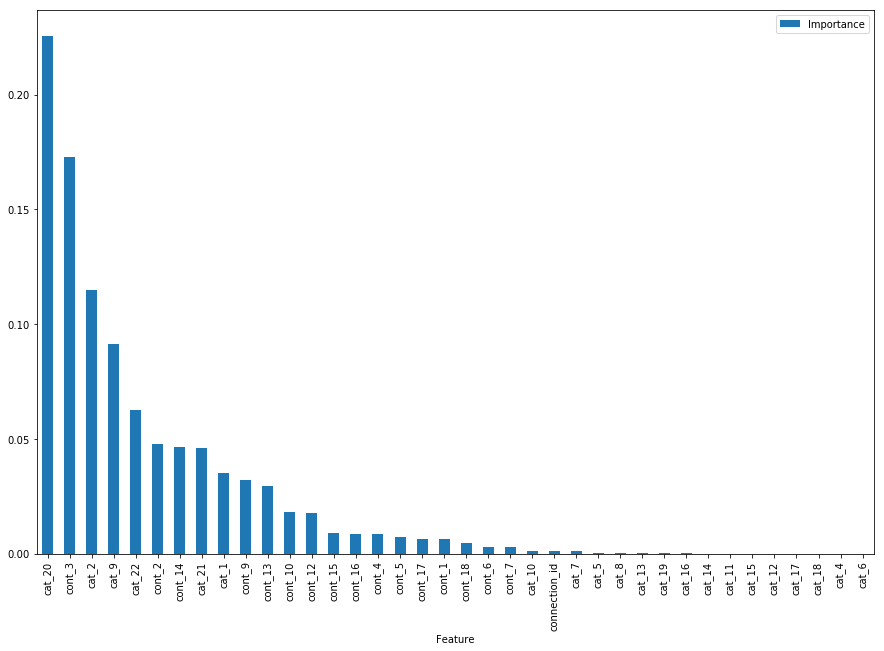

In [57]:
feature_importance = pd.Series(rf.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [ ]:
sub = pd.DataFrame()
sub['connection_id'] = test['connection_id']
sub['target'] = pred
sub.to_csv('rf.csv', index=False)
print('writting is done.')

In [26]:
features = ['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
            'cont_6', 'cont_7','cont_8','cont_9', 'cont_10','cont_11','cont_12',
            'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
            'cat_1', 'cat_2','cat_3','cat_9','cat_20', 'cat_21', 'cat_22','cat_23','no_of_zeroes']
X_train = train[features]
target = train['target']
x_train, X_valid, y_train, y_valid = train_test_split(X_train, target, train_size = 0.7, stratify = target, random_state = 2017)

In [27]:
param_test = {
    'max_depth':[5,10,15,20,25],
    'min_samples_split':[2,10,20,50,100]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=2,min_samples_split=2,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=2017),
                        param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(x_train,y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 25, 'min_samples_split': 2}, 0.99723239148778098)

In [110]:
param_test = {
    'max_depth':[13,15],
    'min_samples_split':[15,20,25]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=20,min_samples_split=50,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(x_train,y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 13, 'min_samples_split': 20}, 0.78103008881294145)

In [112]:
param_test = {
    'min_samples_leaf':[1,2,5,10,15]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=13,min_samples_split=20,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(x_train,y_train)
gsearch.best_params_, gsearch.best_score_

({'min_samples_leaf': 1}, 0.78103008881294145)

In [35]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=20,min_samples_split=50,
                            min_samples_leaf=1,n_jobs=-1,random_state=2017,oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True,
            random_state=2017, verbose=0, warm_start=False)

In [36]:
pred_test = rf.predict(X_valid)
multAcc(pred_test,y_valid)

('maccuracy', 0.78107219498749825)

In [37]:
pred = rf.predict(test[features])

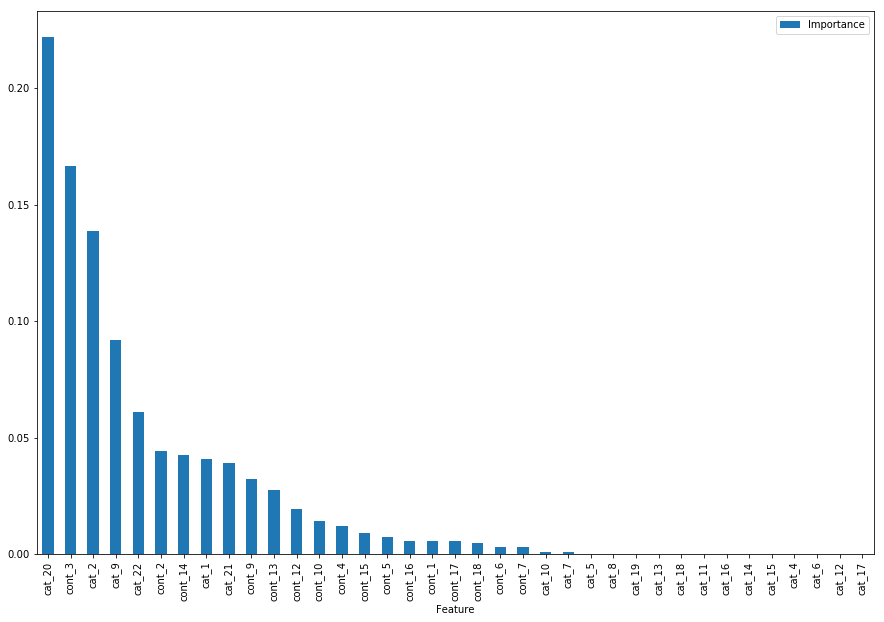

In [38]:
feature_importance = pd.Series(rf.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [49]:
lis1 = ['cat_4','cat_5','cat_6','cat_8','cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15','cat_16', 'cat_17', 'cat_18']
for i in lis1:  
    temp = features.copy()
    temp.remove(i)
    rf = RandomForestClassifier(n_estimators=1000, max_depth=20,min_samples_split=50,
                            min_samples_leaf=1,n_jobs=-1,random_state=2017,oob_score=True)
    rf.fit(x_train[temp],y_train)
    pred_test = rf.predict(X_valid[temp])
    print(i,multAcc(pred_test,y_valid))

cat_4 ('maccuracy', 0.78109188273974761)
cat_5 ('maccuracy', 0.78105250723524899)
cat_6 ('maccuracy', 0.78109188273974761)
cat_8 ('maccuracy', 0.78109188273974761)
cat_11 ('maccuracy', 0.78107219498749825)
cat_12 ('maccuracy', 0.78109188273974761)
cat_13 ('maccuracy', 0.78109188273974761)
cat_14 ('maccuracy', 0.78109188273974761)
cat_15 ('maccuracy', 0.78109188273974761)
cat_16 ('maccuracy', 0.78107219498749825)
cat_17 ('maccuracy', 0.78109188273974761)
cat_18 ('maccuracy', 0.78107219498749825)


In [52]:
lis1 = ['cat_4','cat_6','cat_8', 'cat_12', 'cat_13', 'cat_14', 'cat_15', 'cat_17']
temp = features.copy()
for i in lis1:
    temp.remove(i)
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy', max_depth=20,min_samples_split=50,
                        min_samples_leaf=1,n_jobs=-1,random_state=2017,oob_score=True)
rf.fit(x_train[temp],y_train)
pred_test = rf.predict(X_valid[temp])
print(i,multAcc(pred_test,y_valid))

cat_17 ('maccuracy', 0.78107219498749825)


In [ ]:
'cat_2_2','cat_2_3','cat_2_4','cat_2_5','cat_2_6','cat_2_7','cat_2_8','cat_2_9',
'cat_2_10','cat_2_11','cat_2_12','cat_2_13','cat_2_14','cat_2_15','cat_2_16',
'cat_2_17','cat_2_18','cat_2_19','cat_2_20','cat_2_21','cat_2_22','cat_2_23',
'cat_2_24','cat_2_25','cat_2_26','cat_2_27','cat_2_28','cat_2_29','cat_2_30',
'cat_2_31','cat_2_32','cat_2_33','cat_2_34','cat_2_35','cat_2_36','cat_2_37',
'cat_2_38','cat_2_40','cat_2_41','cat_2_42','cat_2_43','cat_2_44','cat_2_45',
'cat_2_46','cat_2_47','cat_2_48','cat_2_49','cat_2_50','cat_2_51','cat_2_52',
'cat_2_53','cat_2_54','cat_2_55','cat_2_56','cat_2_57','cat_2_58','cat_2_59',
'cat_2_60','cat_2_61','cat_2_62','cat_2_63'

In [69]:
df = pd.concat([train, test], axis=0, copy=True)
# Reset index
df.reset_index(drop=True, inplace=True)

In [70]:
df.head()

,cat_1,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,...,cont_18,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,target
0,3,0,0,0,0,0,0,0,0,0,...,0.0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,3,0,0,0,0,0,0,0,0,0,...,0.0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,0,0,0,0,0,0,0,0,...,0.0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0,0,0,0,0,0,0,0,0,...,0.0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [71]:
len(df)

260473

In [72]:
cat_cols = ['cont_3','cont_14','cont_2','cont_8']

def add_new_col(x):
    if x not in new_col.keys(): 
        # set n/2 x if is contained in test, but not in train 
        # (n is the number of unique labels in train)
        # or an alternative could be -100 (something out of range [0; n-1]
        return int(len(new_col.keys())/2)
    return new_col[x] # rank of the label

for c in cat_cols:
    # get labels and corresponding means
    new_col = train.groupby(c).target.mean().sort_values().reset_index()
    # make a dictionary, where key is a label and value is the rank of that label
    new_col = new_col.reset_index().set_index(c).drop('target', axis=1)['index'].to_dict()
    # add new column to the dataframe
    df[c + '_new'] = df[c].apply(add_new_col)

In [73]:
df.head()

,cat_1,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,...,cont_5,cont_6,cont_7,cont_8,cont_9,target,cont_3_new,cont_14_new,cont_2_new,cont_8_new
0,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,2.0,15,6,32,53
1,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,15,6,31,53
2,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,15,6,32,53
3,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,15,6,32,53
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,2.0,15,6,32,53


In [74]:
len(train)

169307

In [75]:
train.tail()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_19,cat_20,cat_21,cat_22,cat_23,target,cat_20_count,cat_21_count,cat_22_count,cat_23_count
169302,507907.0,0,227,1127,0.0,0.0,0.0,0.0,1.0,0.0,...,0,39,39,39,255,1,49,84,123,115863
169303,507910.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,0,77311,76871,148789,115863
169304,507913.0,0,224,8980,0.0,0.0,0.0,0.0,1.0,0.0,...,0,6,7,49,255,1,1255,2837,113,115863
169305,507916.0,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,0,77311,76871,148789,115863
169306,507919.0,0,498,6486,0.0,0.0,0.0,0.0,1.0,0.0,...,0,15,15,255,255,1,492,2227,148789,115863


In [76]:
train = df[:169307]
train.tail()

,cat_1,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,...,cont_5,cont_6,cont_7,cont_8,cont_9,target,cont_3_new,cont_14_new,cont_2_new,cont_8_new
169302,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,3399,21,1615,53
169303,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,15,6,32,53
169304,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,841,23,1618,53
169305,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,15,6,31,53
169306,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1438,6,1183,53


In [93]:
len(train)

169307

In [77]:
test = df[169307:]
test.head()

,cat_1,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,...,cont_5,cont_6,cont_7,cont_8,cont_9,target,cont_3_new,cont_14_new,cont_2_new,cont_8_new
169307,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,NaN,3313,6,1583,53
169308,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,NaN,15,6,31,53
169309,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,NaN,15,6,32,53
169310,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,NaN,15,6,32,53
169311,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,NaN,15,6,32,53


In [78]:
test.drop(['target'],axis=1,inplace=True)
test.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cat_1,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,...,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_3_new,cont_14_new,cont_2_new,cont_8_new
169307,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,3313,6,1583,53
169308,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,15,6,31,53
169309,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,15,6,32,53
169310,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,15,6,32,53
169311,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,15,6,32,53


In [79]:
train.columns

Index(['cat_1', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_2', 'cat_20',
       'cat_20_count', 'cat_21', 'cat_21_count', 'cat_22', 'cat_22_count',
       'cat_23', 'cat_23_count', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7',
       'cat_8', 'cat_9', 'connection_id', 'cont_1', 'cont_10', 'cont_11',
       'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17',
       'cont_18', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7',
       'cont_8', 'cont_9', 'target', 'cont_3_new', 'cont_14_new', 'cont_2_new',
       'cont_8_new'],
      dtype='object')

In [40]:
lis1 = ['cat_20', 'cat_21', 'cat_22','cat_23']
# df1 = train['cat_20'].value_counts().reset_index(name=(lis1[0]+'_count')).rename(columns={'index':'cat_20'})
# df2 = pd.merge(train,df1,on='cat_20',how='left')
# df2.head()
for i in lis1:
    df1 = train[i].value_counts().reset_index(name=(i+'_count')).rename(columns={'index':i})
    train = pd.merge(train,df1,on=i,how='left')
train.head()    

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_19,cat_20,cat_21,cat_22,cat_23,target,cat_20_count,cat_21_count,cat_22_count,cat_23_count
0,1.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,2,77311,76871,148789,115863
1,4.0,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,0,77311,76871,148789,115863
2,7.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,0,77311,76871,148789,115863
3,10.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,0,77311,76871,148789,115863
4,13.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,511,511,255,255,2,77311,76871,148789,115863


In [89]:
cat_count = train.groupby(['cat_22','cat_23']).size().reset_index()
cat_count.columns = ['cat_22','cat_23','cat_count']

cat_count_test = test.groupby(['cat_22','cat_23']).size().reset_index()
cat_count_test.columns = ['cat_22','cat_23','cat_count']

In [93]:
train = train.merge(cat_count)
test = test.merge(cat_count_test)

In [ ]:
lis1 = ['cat_20', 'cat_21', 'cat_22','cat_23']
for i in lis1:
    df1 = test[i].value_counts().reset_index(name=(i+'_count')).rename(columns={'index':i})
    test = pd.merge(test,df1,on=i,how='left')
test.head()

In [94]:
train.columns

Index(['cat_1', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_2', 'cat_20',
       'cat_20_count', 'cat_21', 'cat_21_count', 'cat_22', 'cat_22_count',
       'cat_23', 'cat_23_count', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7',
       'cat_8', 'cat_9', 'connection_id', 'cont_1', 'cont_10', 'cont_11',
       'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17',
       'cont_18', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7',
       'cont_8', 'cont_9', 'target', 'cont_3_new', 'cont_14_new', 'cont_2_new',
       'cont_8_new', 'cat_count'],
      dtype='object')

In [20]:
train['no_of_zeroes'] = (train==0).sum(axis=1)
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target,no_of_zeroes
0,1.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,511,511,255,255,2,30
1,4.0,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,511,511,255,255,0,31
2,7.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,511,511,255,255,0,31
3,10.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,511,511,255,255,0,31
4,13.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,511,511,255,255,2,30


In [21]:
test['no_of_zeroes'] = (test==0).sum(axis=1)
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,no_of_zeroes
0,2.0,0,331,6085,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,13,13,255,255,29
1,5.0,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,30
2,8.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,30
3,11.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,510,509,255,255,30
4,14.0,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,30


In [22]:
features = ['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
            'cont_6', 'cont_7','cont_8','cont_9', 'cont_10','cont_11','cont_12',
            'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
            'cat_1', 'cat_2','cat_3','cat_9','cat_20', 'cat_21', 'cat_22','cat_23','no_of_zeroes']
X_train = train[features]
target = train['target']
x_train, X_valid, y_train, y_valid = train_test_split(X_train, target, train_size = 0.7, stratify = target, random_state = 2017)
rf = RandomForestClassifier(n_estimators=1000, max_depth=20,min_samples_split=50,
                        min_samples_leaf=1,n_jobs=-1,random_state=2017,oob_score=True)
rf.fit(x_train,y_train)
pred_test = rf.predict(X_valid)
print(multAcc(pred_test,y_valid))

('maccuracy', 0.99621995156812948)


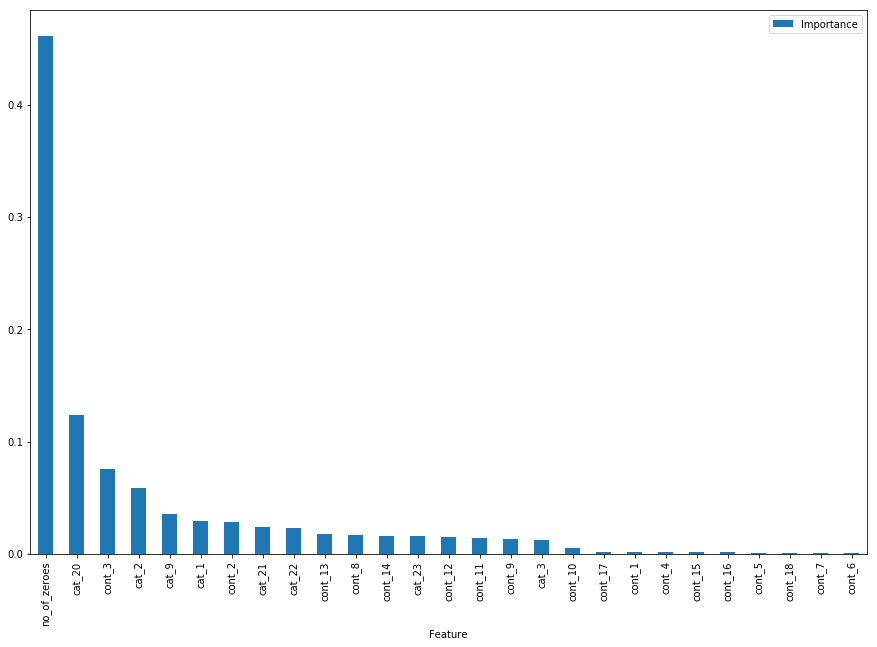

In [23]:
feature_importance = pd.Series(rf.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [24]:
pred = rf.predict(test[features])

In [25]:
sub = pd.DataFrame()
sub['connection_id'] = test_id
sub['target'] = pred
sub.to_csv('rf.csv', index=False)
print('writting is done.')

writting is done.


In [89]:
from sklearn.multiclass import OneVsRestClassifier

In [90]:
ovr = OneVsRestClassifier(estimator=rf,n_jobs=-1)

In [91]:
ovr.fit(x_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True,
            random_state=2017, verbose=0, warm_start=False),
          n_jobs=-1)

In [92]:
pred_test = ovr.predict(X_valid)
multAcc(pred_test,y_valid)

('maccuracy', 0.78095406847400228)

In [69]:
ovr.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_jobs=-1, oob_score=True,
             random_state=2017, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_jobs=-1, oob_score=True,
             random_state=2017, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             

In [93]:
pred = ovr.predict(test[features])

In [94]:
sub = pd.DataFrame()
sub['connection_id'] = test_id
sub['target'] = pred
sub.to_csv('ovr.csv', index=False)
print('writting is done.')

writting is done.


In [79]:
len(train)

169307

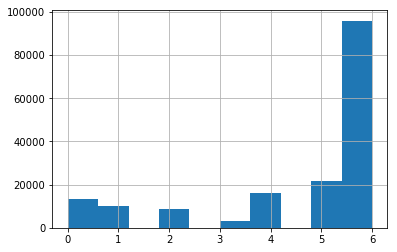

In [139]:
train['cat_20'].hist()

In [96]:
train2 = pd.read_csv('train_data.csv')

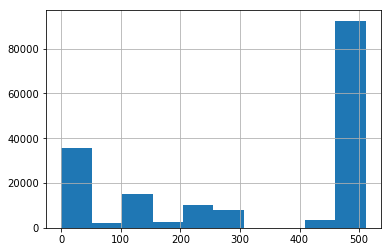

In [97]:
train2['cat_20'].hist()

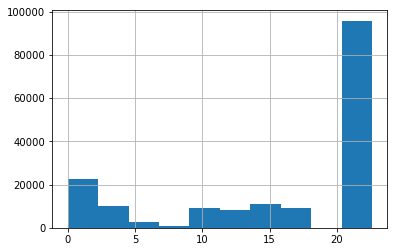

In [98]:
np.sqrt(train2['cat_20']).hist()

In [99]:
train['cat_20'].value_counts()

6.238325    77311
0.693147    13506
6.236370     9252
1.098612     3794
6.234411     2094
1.386294     2047
1.609438     1730
1.791759     1433
1.945910     1255
2.079442     1147
2.197225      943
2.302585      873
2.397895      866
2.484907      787
2.564949      720
2.639057      644
2.708050      556
6.232448      516
2.772589      492
2.833213      469
2.890372      423
4.875197      384
2.944439      358
4.941642      345
4.795791      342
4.709530      339
4.770685      339
4.948760      337
4.762174      336
4.897840      332
            ...  
5.869297        1
6.023448        1
5.910797        1
6.042633        1
6.008813        1
6.040255        1
5.894403        1
5.899897        1
5.739793        1
5.958425        1
5.902633        1
5.976351        1
6.052089        1
5.713733        1
5.811141        1
5.857933        1
5.768321        1
5.968708        1
5.762051        1
5.934894        1
5.929589        1
5.849325        1
5.780744        1
5.916202        1
5.855072  

In [101]:
train.dtypes

connection_id    float64
cont_1           float64
cont_2           float64
cont_3           float64
cont_4           float64
cont_5           float64
cont_6           float64
cont_7           float64
cont_8           float64
cont_9           float64
cont_10          float64
cont_11          float64
cont_12          float64
cont_13          float64
cont_14          float64
cont_15          float64
cont_16          float64
cont_17          float64
cont_18          float64
cat_1              int64
cat_2              int64
cat_3              int64
cat_4              int64
cat_5              int64
cat_6              int64
cat_7              int64
cat_8              int64
cat_9              int64
cat_10             int64
cat_11             int64
cat_12             int64
cat_13             int64
cat_14             int64
cat_15             int64
cat_16             int64
cat_17             int64
cat_18             int64
cat_19             int64
cat_20           float64
cat_21           float64


In [107]:
train['cat_20'].unique().sum()

2254.9191496739927

In [37]:
for i in features:
    print(i,train[i].nunique())

cont_1 1076
cont_2 2215
cont_3 6627
cont_4 74
cont_5 48
cont_6 77
cont_7 51
cont_8 90
cont_9 70
cont_10 64
cont_11 101
cont_12 101
cont_13 101
cont_14 57
cont_15 92
cont_16 70
cont_17 101
cont_18 99
cat_1 3
cat_2 64
cat_3 11
cat_9 2
cat_20 439
cat_21 393
cat_22 256
cat_23 256


In [42]:
train['cat_1'].value_counts()

3    97394
1    64737
2     7176
Name: cat_1, dtype: int64

In [41]:
temp = pd.get_dummies(train['cat_1'],prefix='cat_1')
temp.head()

,cat_1_1,cat_1_2,cat_1_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [43]:
temp1 = pd.get_dummies(train['cat_3'],prefix='cat_3')
temp1.head()

,cat_3_1,cat_3_2,cat_3_3,cat_3_4,cat_3_5,cat_3_6,cat_3_7,cat_3_8,cat_3_9,cat_3_10,cat_3_11
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [44]:
train = pd.concat([train,temp,temp1],axis=1)
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_3_2,cat_3_3,cat_3_4,cat_3_5,cat_3_6,cat_3_7,cat_3_8,cat_3_9,cat_3_10,cat_3_11
0,1.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0.0,6.255750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,13.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
temp2 = pd.get_dummies(train['cat_2'],prefix='cat_2')
train = pd.concat([train,temp2],axis=1)
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_2_56,cat_2_57,cat_2_58,cat_2_59,cat_2_60,cat_2_61,cat_2_62,cat_2_63,cat_2_65,cat_2_69
0,1.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0.0,6.255750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,13.0,0.0,6.940222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
test_temp = pd.get_dummies(test['cat_1'],prefix='cat_1')
test_temp1 = pd.get_dummies(test['cat_3'],prefix='cat_3')
test = pd.concat([test,test_temp,test_temp1],axis=1)
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_3_2,cat_3_3,cat_3_4,cat_3_5,cat_3_6,cat_3_7,cat_3_8,cat_3_9,cat_3_10,cat_3_11
0,2.0,0.0,5.805135,8.713746,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,6.255750,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,0.0,6.940222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,11.0,0.0,6.940222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,0.0,6.940222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
test_temp2 = pd.get_dummies(test['cat_2'],prefix='cat_2')
test = pd.concat([test,test_temp2],axis=1)
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_2_55,cat_2_56,cat_2_57,cat_2_58,cat_2_59,cat_2_60,cat_2_61,cat_2_62,cat_2_63,cat_2_67
0,2.0,0.0,5.805135,8.713746,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,6.255750,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,0.0,6.940222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,11.0,0.0,6.940222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,0.0,6.940222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.columns

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target'],
      dtype='object')

In [20]:
lis = ['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23']
for i in lis:
    print(i,train[i].nunique(),test[i].nunique())

cat_1 3 3
cat_2 64 64
cat_3 11 11
cat_4 2 2
cat_5 3 3
cat_6 2 1
cat_7 18 16
cat_8 2 3
cat_9 2 2
cat_10 11 9
cat_11 2 2
cat_12 3 2
cat_13 10 10
cat_14 10 4
cat_15 3 2
cat_16 6 4
cat_17 1 1
cat_18 2 1
cat_19 2 2
cat_20 439 426
cat_21 393 361
cat_22 256 256
cat_23 256 256


In [48]:
import seaborn as sns

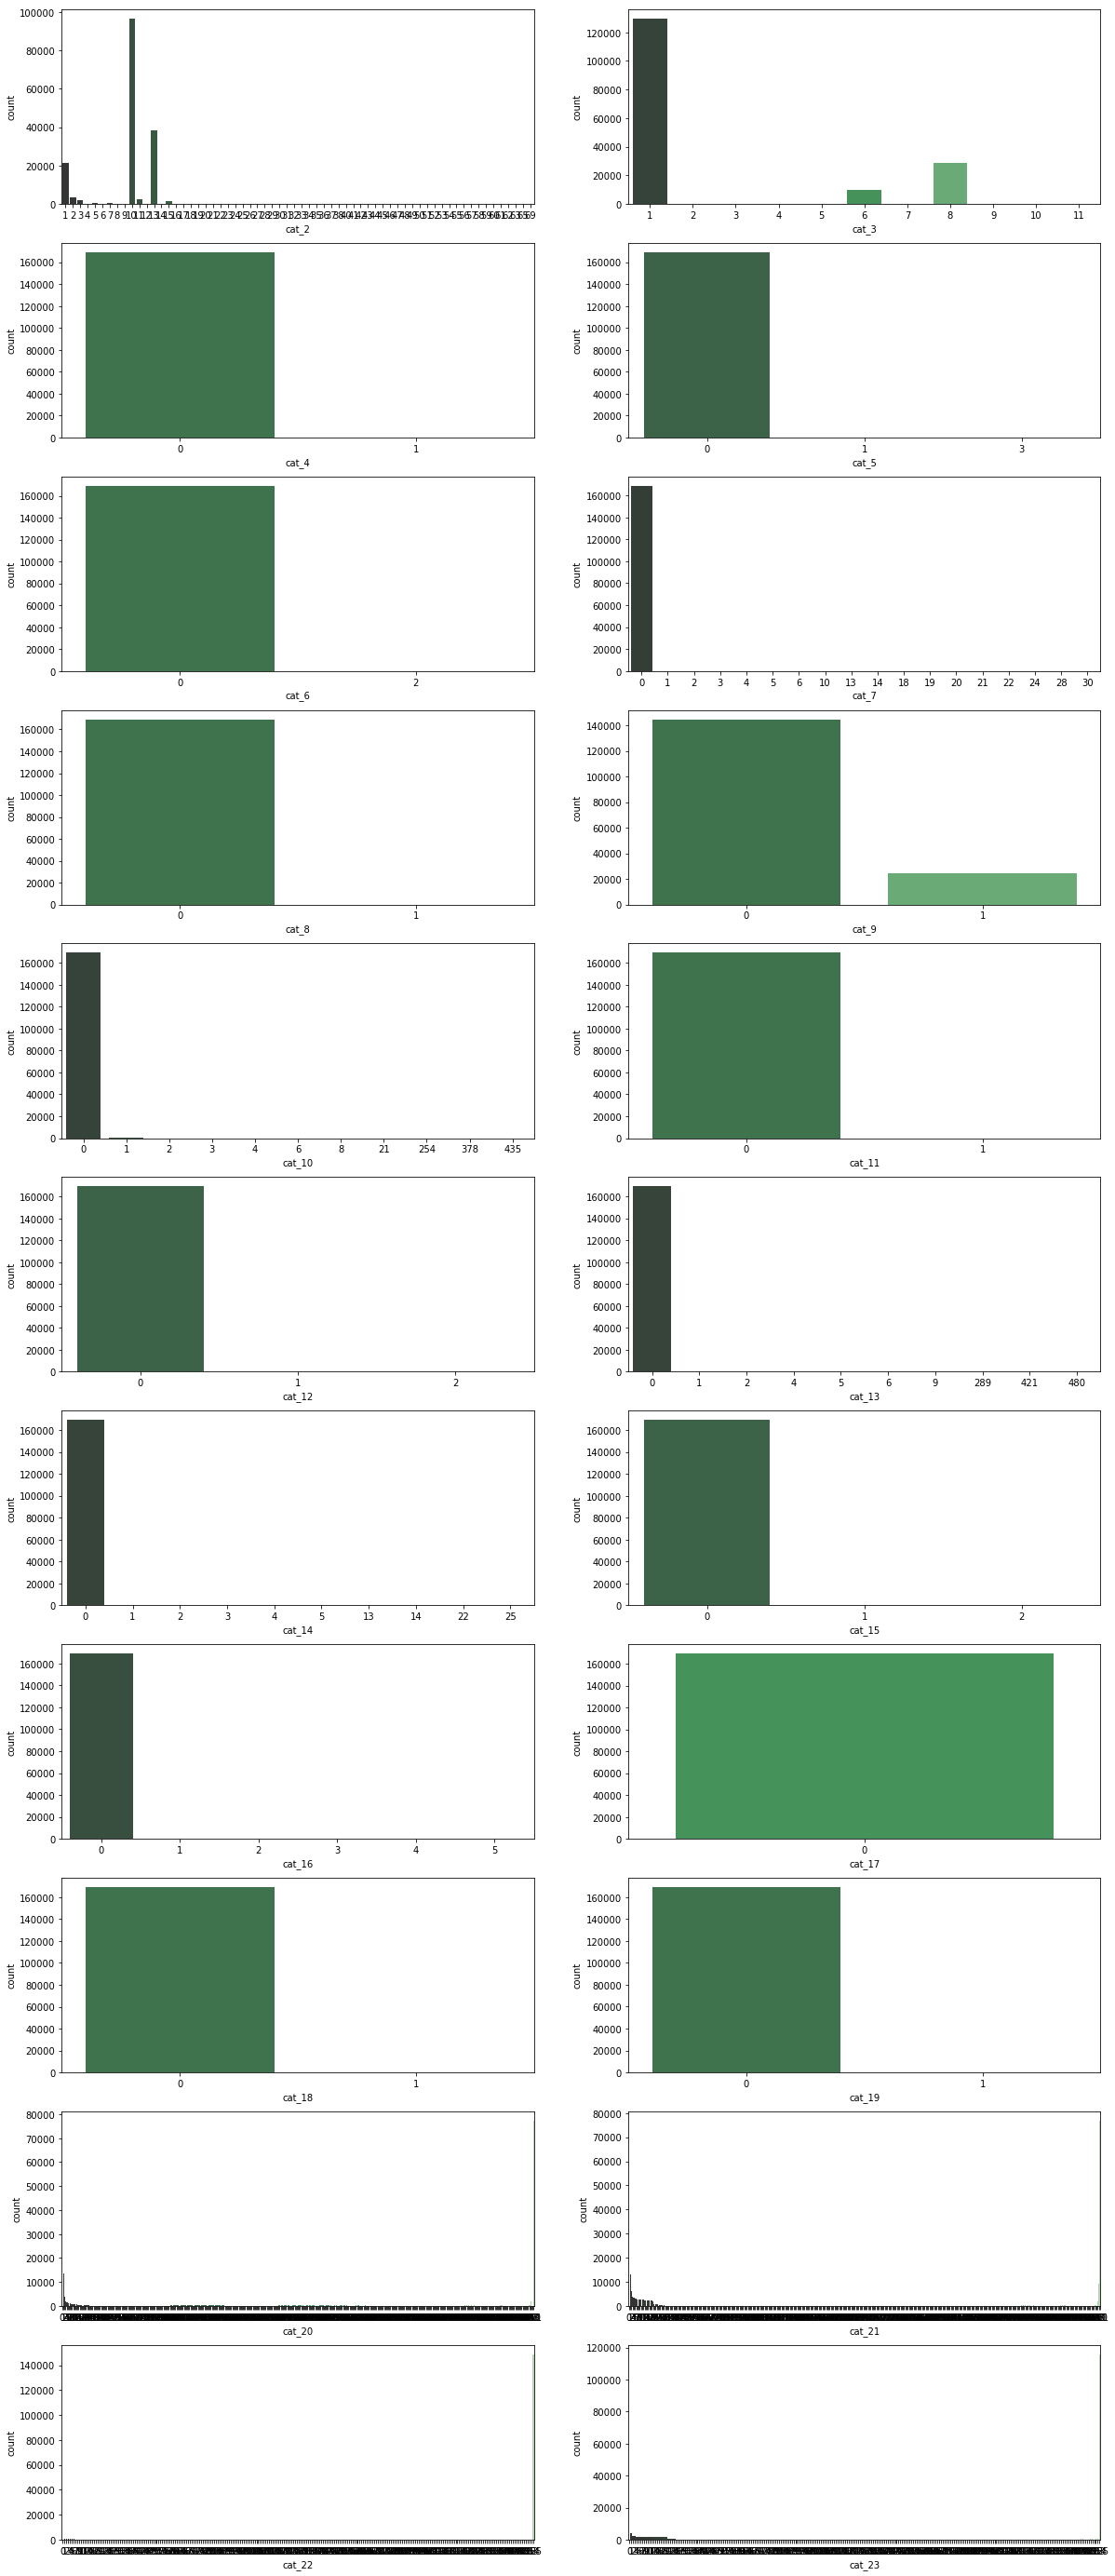

In [68]:
lis = ['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23']

fig = plt.figure(figsize=(20,50))
for i in range(1,23):
    ax = fig.add_subplot(11,2,i)
    sns.countplot(x = lis[i],data=train,palette='Greens_d',ax = ax)